In [21]:
from google.colab import drive 
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Data Augmentation-XrayImg/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Data Augmentation-XrayImg


In [ ]:
%cd original/
!curl -L "https://app.roboflow.com/ds/hFAZvtsbYG?key=5beMU2HYuQ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
%cd ..

In [5]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/{cu_version}/{torch_version}/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/{cu_version}/{torch_version}/index.html
     |████████████████████████████████| 256kB 18.8MB/s 
     |████████████████████████████████| 194kB 50.7MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.0-cp37-cp37m-linux_x86_64.whl size=22448209 sha256=800e267d15ae680ec459025218bad0a2e58d87e2cb5cefdd20fb040c5fc9fa5b
  Stored in directory: /root/.cache/pip/wheels/34/60/a1/e53785d2fbb520db58f2d77b4fca2b34435d2ef2015c18d608
Successfully built mmcv-full


In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -r requirements/build.txt
!pip install -v -e .
!mkdir checkpoints

In [22]:
%cd mmdetection


/content/gdrive/My Drive/Data Augmentation-XrayImg/mmdetection


In [9]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
import json
import mmcv


In [12]:
#download pretrained model
#!wget -P ./checkpoints/ http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_bbox_mAP-0.398_20200504_163323-30042637.pth
!wget -P ./checkpoints/ http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_2x_coco/faster_rcnn_r50_caffe_fpn_mstrain_2x_coco_bbox_mAP-0.397_20200504_231813-10b2de58.pth

--2021-04-08 13:45:34--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_2x_coco/faster_rcnn_r50_caffe_fpn_mstrain_2x_coco_bbox_mAP-0.397_20200504_231813-10b2de58.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167291065 (160M) [application/octet-stream]
Saving to: ‘./checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_2x_coco_bbox_mAP-0.397_20200504_231813-10b2de58.pth’

faster_rcnn_r50_caf 100%[===================>] 159.54M  8.95MB/s    in 19s     

2021-04-08 13:45:55 (8.38 MB/s) - ‘./checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_2x_coco_bbox_mAP-0.397_20200504_231813-10b2de58.pth’ saved [167291065/167291065]



In [ ]:
# TRAIN
#/content/gdrive/MyDrive/Data Augmentation-XrayImg/original/train/_annotations.coco.json
!python3 ./tools/train.py ../train_xray.py 

In [50]:
from mmdet.apis import init_detector, inference_detector
!python3 ./tools/test.py ../train_xray.py ./work_dirs/train_xray/epoch_30.pth --eval bbox


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Use load_from_local loader
[>>] 40/40, 9.2 task/s, elapsed: 4s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.302
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.703
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.246
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.303
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.414
Average Recall     (AR) @[ IoU=0.50:0.95 | area=  

Use load_from_local loader


/content/gdrive/My Drive/Data Augmentation-XrayImg/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


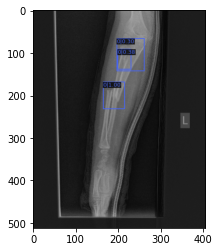

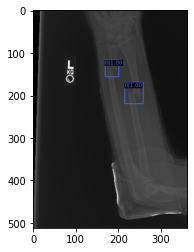

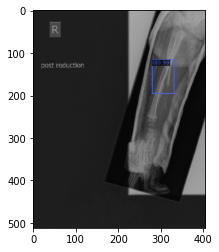

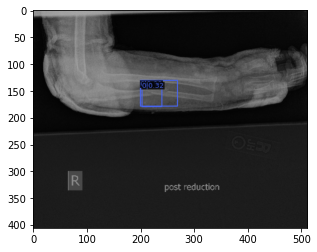

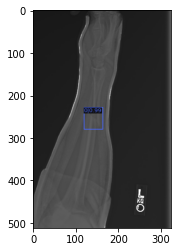

In [56]:

 # predict
config_file = '../train_xray.py'
checkpoint_file = './work_dirs/train_xray/latest.pth'
device = 'cuda:0'
# init a detector
model = init_detector(config_file, checkpoint_file, device=device)
# inference the demo image
img_paths=glob.glob('../original/dataDetect_test/*.png')
for path in img_paths[35:40]:
  result=inference_detector(model, path)
  img=cv2.imread(path)
  plt.figure(figsize=(20,20))
  plt.imshow(model.show_result(img, result))
  plt.show()
